# Touirst Flows
### Exploritory data analysis

## Part 1: Cluster Analysis

This notebook is split into three parts:\
1) Data Wrangling\
2) Finding optimal number of groups\
3) group using KMeans algorithm\
4) Find most important features used to group

### 1.1) Data Wrangling
First need to load the data, find if there are missing values and either drop or fill the missing splaces with appropriate value.

In [84]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
import seaborn as sns


In [2]:
whole_data = pd.read_csv('tourist_flows.csv')

In [3]:
whole_data.sample(10)

,Unnamed: 0,Date,Nationality,Visitor_Index,Seat_Index,Outbound_Index,Stock index value,Temperature Difference,Oil Price,Exchange Rate to USD,Google Searches,Flight Prices,Trade Flows,Visa Policy,Vacation Days
2420,2420,2018-03-01,Ireland,180.702181,180.467742,139.824408,6593.65,19.0,64.17,1.221420,68.50,661.499586,5326.000000,1.0,NaN
2186,2186,2017-03-01,Russian Federation,84.085909,105.210979,66.635646,1995.90,25.0,50.90,0.016734,60.50,400.777012,12366.000000,1.0,1.0
1125,1125,2015-10-01,Japan,77.170259,119.910011,94.918926,19083.10,14.0,46.96,0.008322,65.10,682.016044,872.766671,1.0,1.0
472,472,2014-05-01,Australia,150.612968,135.373473,104.279674,5492.55,18.0,105.71,0.930383,51.75,NaN,829.446756,1.0,0.0
362,362,2013-03-01,Spain,132.778424,111.043036,100.000000,7920.00,17.0,102.52,1.296626,20.00,NaN,896.719880,1.0,6.0
629,629,2014-06-01,Ireland,74.490192,96.774194,101.972519,4699.94,22.0,108.37,1.360029,31.10,NaN,4201.015360,1.0,1.0
1229,1229,2015-06-01,Philippines,186.452616,119.016484,110.251251,7564.50,3.0,61.31,0.022226,65.50,623.046283,-825.031019,0.0,5.0
2563,2563,2018-02-01,United Kingdom,153.920543,116.976709,123.054334,7231.91,27.0,63.46,1.417430,83.00,482.200471,-14728.323960,1.0,12.0
693,693,2014-10-01,Kuwait,149.673147,137.693429,115.004980,1170.71,1.0,86.08,3.463495,118.00,NaN,NaN,1.0,14.0
167,167,2013-12-01,Ireland,99.681540,100.000000,100.000000,4539.43,16.0,105.48,1.369724,40.00,NaN,2783.830560,1.0,10.0


In [4]:
whole_data.describe()

,Unnamed: 0,Visitor_Index,Seat_Index,Outbound_Index,Stock index value,Temperature Difference,Oil Price,Exchange Rate to USD,Google Searches,Flight Prices,Trade Flows,Visa Policy,Vacation Days
count,2574.00000,2457.000000,2373.000000,2457.000000,2313.000000,2446.000000,2457.000000,2457.000000,2457.000000,1375.000000,1705.000000,2457.000000,2403.000000
mean,1286.50000,114.548893,130.610904,110.110533,14641.103070,12.443581,69.111746,0.893165,49.875710,488.368817,-698.636312,0.535613,8.892218
std,743.19412,55.693083,74.542771,18.528682,21594.143234,10.415965,26.117804,1.880242,25.623284,249.655443,16726.211687,0.498832,10.314276
min,0.00000,8.583009,0.000000,48.473036,162.570000,-23.000000,29.780000,0.000026,4.230000,0.000000,-84147.460986,0.000000,0.000000
25%,643.25000,82.079238,100.000000,100.000000,1046.380000,4.000000,47.110000,0.014875,29.460000,305.461731,-2860.602817,0.000000,1.000000
50%,1286.50000,109.424088,116.344530,107.906636,5681.600000,14.000000,57.540000,0.264146,45.400000,445.014395,278.465280,1.000000,5.000000
75%,1929.75000,134.978983,139.499599,116.875049,18308.480000,20.000000,102.100000,1.123785,67.300000,594.076873,3774.338760,1.000000,12.000000
max,2573.00000,555.513866,844.086022,201.522983,119528.790000,43.000000,108.760000,18.631742,149.750000,1534.909758,61286.000000,1.000000,38.000000


In [5]:
whole_data.drop(['Unnamed: 0'], axis=1, inplace=True)

In [6]:
whole_data

,Date,Nationality,Visitor_Index,Seat_Index,Outbound_Index,Stock index value,Temperature Difference,Oil Price,Exchange Rate to USD,Google Searches,Flight Prices,Trade Flows,Visa Policy,Vacation Days
0,2013-01-01,Australia,100.000000,100.000000,100.000000,4878.78,-2.0,105.10,1.049265,51.25,NaN,-964.526621,1.0,20.0
1,2013-02-01,Australia,68.266626,89.955315,100.000000,5104.08,1.0,107.64,1.032628,51.50,NaN,1053.590722,1.0,0.0
2,2013-03-01,Australia,75.436120,103.043266,100.000000,4966.50,4.0,102.52,1.033665,53.20,NaN,3361.356694,1.0,1.0
3,2013-04-01,Australia,123.032540,129.655435,100.000000,5191.22,11.0,98.85,1.037670,52.00,NaN,2121.237607,1.0,11.0
4,2013-05-01,Australia,158.374948,122.684724,100.000000,4926.57,17.0,99.37,0.992279,54.00,NaN,2464.090152,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2569,2018-02-01,USA,93.362997,135.838851,151.019938,2713.83,16.0,63.46,1.000000,87.75,779.497553,-64756.401317,1.0,NaN
2570,2018-03-01,USA,112.590966,144.611683,151.019938,2640.87,19.0,64.17,1.000000,80.25,814.316708,-64591.870000,1.0,NaN
2571,2018-04-01,USA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2572,2018-05-01,USA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Missing Data

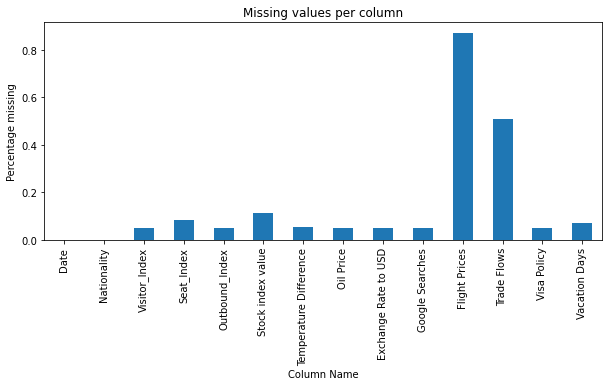

In [7]:
ax  = (whole_data.isna().sum()/ whole_data.count()).plot(kind='bar',figsize=(10,4), title='Missing values per column') # Missing data
ax.set_xlabel("Column Name")
ax.set_ylabel("Percentage missing");

Large percentage of of Flight Prices and Trade Flows are missing, therefore it may be nessessary to drop the columns.

In [8]:
whole_data['Flight Prices'].describe()

count    1375.000000
mean      488.368817
std       249.655443
min         0.000000
25%       305.461731
50%       445.014395
75%       594.076873
max      1534.909758
Name: Flight Prices, dtype: float64

In [9]:
whole_data.groupby('Nationality')['Flight Prices'].describe()

,count,mean,std,min,25%,50%,75%,max
Nationality,,,,,,,,
Australia,38.0,1036.222969,130.428488,831.427513,941.522209,1018.673521,1105.593151,1443.500866
Bahrain,38.0,157.641854,19.628078,129.172640,142.279176,154.776654,173.169332,196.240132
Brazil,38.0,1158.424165,173.393038,856.252785,1063.812099,1151.714229,1262.250985,1534.909758
Canada,38.0,899.563142,157.775366,689.649867,755.777156,898.900698,1003.574037,1339.424127
China,38.0,660.239875,89.735109,508.482913,598.826378,656.644763,716.612899,898.849606
Czech Republic,3.0,438.702092,41.058892,397.254042,418.372921,439.491801,459.426118,479.360434
Denmark,3.0,542.996412,28.487367,510.201670,533.689943,557.178216,559.393783,561.609351
Egypt,38.0,337.797025,55.386160,260.849326,304.761348,333.481742,351.268675,527.728842
France,38.0,475.651649,54.557854,399.576918,428.950696,470.468649,507.257246,636.762912


In [10]:
whole_data.groupby('Nationality')['Flight Prices'].mean()-whole_data.groupby('Nationality')['Flight Prices'].median()

Nationality
Australia             17.549447
Bahrain                2.865200
Brazil                 6.709936
Canada                 0.662444
China                  3.595112
Czech Republic        -0.789709
Denmark              -14.181803
Egypt                  4.315283
France                 5.183000
Germany               19.002675
India                  0.459804
Iran                   6.441027
Iraq                  24.809804
Ireland               16.127462
Italy                  4.355026
Japan                  2.715795
Jordan                 7.765539
Kazakhstan            16.944257
Kuwait                 4.554477
Lebanon               11.655175
Netherlands            8.462682
Nigeria               -0.573621
Oman                 -14.456298
Pakistan               2.770947
Philippines            5.470633
Poland               -23.024585
Russian Federation     6.736312
Saudi Arabia           0.389545
South Africa           1.440078
South Korea          -25.301997
Spain                  5.427

The variation of flight prices does not seem to vary significantly per country and the data is not skewed as shown by the small difference between the mean and median. Therefore, will replace missing values with mean.

In [11]:
whole_data['Flight Prices'] = whole_data.groupby('Nationality')['Flight Prices'].transform(lambda x: x.fillna(x.mean()))

Now to look at Trade Flows

In [12]:
whole_data.groupby('Nationality')['Trade Flows'].describe()

,count,mean,std,min,25%,50%,75%,max
Nationality,,,,,,,,
Australia,62.0,540.327462,1865.310217,-3848.207015,-517.923721,270.166525,1806.835425,6103.286385
Bahrain,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Brazil,63.0,1664.426122,3084.151738,-5003.400000,-331.900000,1827.500000,4079.250000,7133.600000
Canada,63.0,-395.022372,1600.877497,-3562.381543,-1711.604212,-290.274601,822.731298,3060.082747
China,62.0,35962.646777,17753.896110,-22569.000000,27472.750000,39743.500000,48301.500000,61286.000000
Czech Republic,61.0,1569.898634,422.094875,456.343200,1378.250600,1649.409720,1850.092120,2407.413680
Denmark,62.0,916.315340,350.041398,193.980000,635.001582,897.767900,1213.651385,1938.760650
Egypt,61.0,-3013.938468,1207.791844,-5056.124495,-3490.000000,-3166.000000,-2717.000000,3608.000000
France,62.0,-7259.547230,1905.144078,-11965.882000,-8486.543088,-7050.667390,-6040.484860,-3387.149610


In [13]:
whole_data['Trade Flows']=whole_data.groupby('Nationality').transform(lambda x: x.fillna(x.mean()))

In [14]:
whole_data['Trade Flows']=whole_data.groupby('Nationality')['Trade Flows'].transform(lambda x: x.fillna(x.mean()))

In [15]:
whole_data.groupby('Nationality')['Trade Flows'].describe()

,count,mean,std,min,25%,50%,75%,max
Nationality,,,,,,,,
Australia,66.0,120.865632,32.385241,62.541317,96.772509,119.977703,141.022419,196.904576
Bahrain,66.0,109.027276,24.790950,46.734155,97.911480,109.027276,122.237811,186.011459
Brazil,66.0,107.469794,35.152921,50.221516,81.149547,107.469794,126.429458,217.571949
Canada,66.0,121.842455,29.141385,70.430206,100.108585,121.555798,140.960389,201.965285
China,66.0,176.924965,78.158813,78.243754,116.699246,158.595781,212.562706,445.284616
Czech Republic,66.0,156.182375,87.651244,40.543294,94.419430,138.388410,189.456214,406.900350
Denmark,66.0,82.275073,37.234886,25.014071,44.555114,86.677337,109.314559,161.879125
Egypt,66.0,113.623595,25.712544,49.788187,95.684938,120.214360,132.903336,161.395333
France,66.0,110.105356,33.376324,45.239291,80.765840,113.139576,133.365141,188.951805


In [16]:
whole_data.groupby('Nationality')['Visitor_Index'].describe()

,count,mean,std,min,25%,50%,75%,max
Nationality,,,,,,,,
Australia,63.0,120.865632,33.159499,62.541317,95.977701,117.772794,142.320302,196.904576
Bahrain,63.0,109.027276,25.383646,46.734155,97.498717,108.150191,122.837995,186.011459
Brazil,63.0,107.469794,35.993349,50.221516,80.392932,103.130306,127.178341,217.571949
Canada,63.0,121.842455,29.838090,70.430206,99.634814,121.116410,142.385753,201.965285
China,63.0,176.924965,80.027415,78.243754,115.688986,157.035385,214.552596,445.284616
Czech Republic,63.0,156.182375,89.746789,40.543294,93.157284,133.545379,193.676777,406.900350
Denmark,63.0,82.275073,38.125089,25.014071,43.344745,89.554179,109.675524,161.879125
Egypt,63.0,113.623595,26.327273,49.788187,94.440702,120.531246,133.291936,161.395333
France,63.0,110.105356,34.174277,45.239291,79.257433,114.177751,134.201713,188.951805


In [17]:
whole_data['Stock index value'] = whole_data.groupby('Nationality')['Stock index value'].transform(lambda x: x.fillna(x.mean()))

In [18]:
whole_data.drop(['Date'], axis=1, inplace=True)

In [19]:
list_of_titles = []
for x in whole_data:
    list_of_titles.append(x)

In [20]:
for x in list_of_titles[1:]:
    whole_data[f'{x}'] = whole_data.groupby('Nationality')[f'{x}'].transform(lambda x: x.fillna(x.mean()))

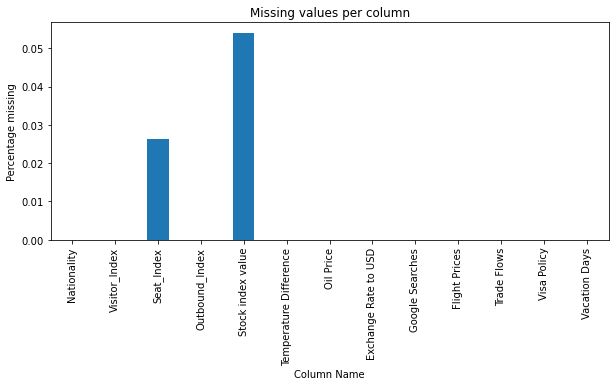

In [21]:
ax  = (whole_data.isna().sum()/ whole_data.count()).plot(kind='bar',figsize=(10,4), title='Missing values per column') # Missing data
ax.set_xlabel("Column Name")
ax.set_ylabel("Percentage missing");

The remaining values are missing as the country does not have a seat index or stock index value, therefore these values will be replaced with zero

In [22]:
whole_data['Trade Flows'] = whole_data.groupby('Nationality')['Trade Flows'].transform(lambda x: x.fillna(x.mean()))

In [23]:
whole_data.groupby('Nationality')['Stock index value'].describe()

,count,mean,std,min,25%,50%,75%,max
Nationality,,,,,,,,
Australia,66.0,5456.151905,313.174839,4802.59,5234.8950,5438.195000,5708.955000,6065.10
Bahrain,66.0,1282.118254,113.231814,1085.14,1189.6850,1283.585000,1361.980000,1476.02
Brazil,66.0,56890.655079,10075.990412,40406.00,50527.3825,54442.400000,61751.837500,85365.60
Canada,66.0,837.833016,67.500645,695.52,786.8800,848.640000,890.992500,959.70
China,66.0,2891.603810,617.170279,1979.21,2252.6125,3004.310000,3257.065000,4611.74
Czech Republic,66.0,985.513333,79.910113,816.91,948.5125,984.326667,1019.860000,1258.80
Denmark,66.0,1044.555714,231.421373,617.43,893.0375,1128.840000,1208.325000,1395.66
Egypt,66.0,9137.148730,3078.482352,4752.22,7067.6150,8313.835000,11050.712500,17450.15
France,66.0,4600.268889,461.617130,3723.00,4313.3050,4507.440000,4995.317500,5503.29


In [24]:
whole_data = whole_data.fillna(0)

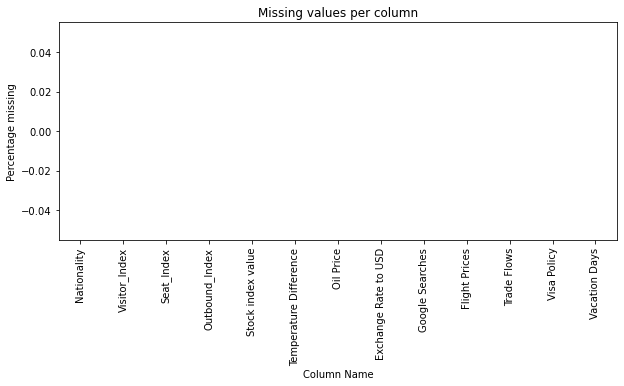

In [25]:
ax  = (whole_data.isna().sum()/ whole_data.count()).plot(kind='bar',figsize=(10,4), title='Missing values per column') # Missing data
ax.set_xlabel("Column Name")
ax.set_ylabel("Percentage missing");

As can be seen above there are no null values in the dataframe

## Cluster by Nationality

KMeans clustering performs better with normalised data, therefore, therefore min max scaling will be applied column wise.

In [28]:
nation_mean = whole_data.groupby('Nationality').mean()

In [107]:
list_of_columns = []
for x in nation_mean:
    list_of_columns.append(x)

In [108]:
for x in nation_mean:
    nation_mean[f'{x}'] = scaler.fit_transform(nation_mean[f'{x}'].values.reshape(-1,1))
    

In [109]:
sse_list = []
for k in range(1,10):
    km = KMeans(n_clusters=k)
    km.fit_predict(nation_mean)
    scaler.fit(nation_mean)
    sse_list.append(km.inertia_)

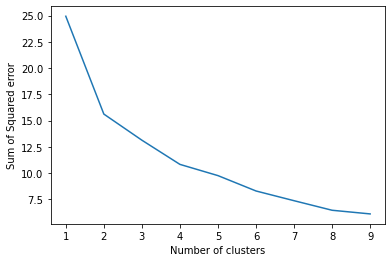

In [111]:
plt.xlabel('Number of clusters')
plt.ylabel('Sum of Squared error')
plt.plot(range(1,10), sse_list);

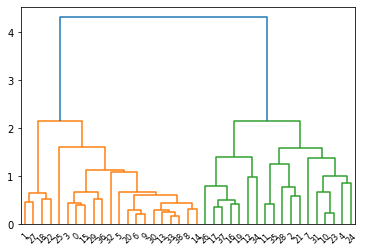

In [112]:
import scipy.cluster.hierarchy as sch

dendrogram = sch.dendrogram(sch.linkage(nation_mean, method = 'ward'))

In [114]:
km = KMeans(n_clusters=2)

In [115]:
cluster_prediction = km.fit_predict(nation_mean)

nation_mean['cluster'] = cluster_prediction

In [117]:
cluster_groups = nation_mean['cluster']

In [119]:
cluster_groups.to_csv('Clusters.csv')

In [ ]:
nation_mean[nation_mean['cluster']==0]

# Finding most differentiating variables

In [48]:
from sklearn.linear_model import LogisticRegression

In [49]:
model = LogisticRegression()

In [50]:
cluster = nation_mean['cluster']

In [51]:
dependent_variables = nation_mean.drop(['cluster'], axis=1)

In [52]:
model.fit(dependent_variables,cluster)

LogisticRegression()

In [53]:
predictions = model.predict(dependent_variables)

In [54]:
predictions

array([0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0])

In [68]:
nation_mean['coef'] = list_of_coef[0][0]

In [75]:
nation_mean = nation_mean.drop(['cluster'], axis = 1)

In [76]:
list_of_coef2 = nation_mean.T

In [79]:
list_of_coef2

Nationality,Australia,Bahrain,Brazil,Canada,China,Czech Republic,Denmark,Egypt,France,Germany,...,Spain,Sudan,Sweden,Switzerland,Syria,Turkey,USA,Ukraine,United Kingdom,coef
Visitor_Index,0.354459,0.296772,0.289182,0.359219,0.627631,0.526554,0.166411,0.319169,0.302025,0.222846,...,0.379769,0.366590,0.177737,0.378458,0.326753,0.256657,0.208497,0.057668,0.411897,-0.165364
Seat_Index,0.282915,0.220624,0.215229,0.261775,0.228302,0.295737,0.213432,0.216956,0.210950,0.198421,...,0.282829,0.222586,1.000000,0.233468,0.000000,0.239416,0.288122,0.201889,0.233356,-0.192841
Outbound_Index,0.532090,0.804799,0.444515,0.393591,0.906770,0.657085,0.538989,0.651316,0.564854,0.527497,...,0.680455,1.000000,0.555661,0.520608,0.039283,0.590447,0.740160,0.667622,0.584031,-0.114418
Stock index value,0.064954,0.015263,0.677272,0.009974,0.034424,0.011732,0.012435,0.108776,0.054765,0.124415,...,0.116670,0.000000,0.017182,0.101346,0.000000,1.000000,0.024719,0.003788,0.080489,0.335380
Temperature Difference,0.570031,0.167603,0.451980,0.485058,0.643613,0.792139,0.824330,0.352747,0.754598,0.785888,...,0.621392,0.251631,0.880651,0.810026,0.478800,0.654059,0.681290,0.797589,0.786335,-0.332779
Oil Price,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Exchange Rate to USD,0.080163,0.258078,0.034723,0.081175,0.015232,0.004370,0.015684,1.000000,0.116898,0.116898,...,0.116898,0.007459,0.012643,0.102052,0.000592,0.037508,0.097265,0.006249,0.143314,-0.102791
Google Searches,0.373095,0.594932,0.355229,0.095397,0.145117,0.273427,0.226828,0.625958,0.133557,0.132626,...,0.144602,0.214329,0.292185,0.267799,0.000000,0.421189,0.081591,0.360735,0.267039,-0.000535
Flight Prices,0.894511,0.136083,1.000000,0.776540,0.569947,0.378706,0.468737,0.291600,0.410602,0.419065,...,0.432261,0.287142,0.370712,0.497494,0.000000,0.315396,0.782127,0.287184,0.443302,-0.219184
Trade Flows,0.354459,0.296772,0.289182,0.359219,0.627631,0.526554,0.166411,0.319169,0.302025,0.222846,...,0.379769,0.366590,0.177737,0.378458,0.326753,0.256657,0.208497,0.057668,0.411897,-0.165364


In [74]:
list_of_coef

array([[-1.65364213e-01, -1.92840868e-01, -1.14418443e-01,
         3.35380281e-01, -3.32779062e-01,  0.00000000e+00,
        -1.02791290e-01, -5.34785317e-04, -2.19184438e-01,
        -1.65364213e-01, -3.12747394e+00,  3.04031808e-01]])

In [78]:
list_of_coef2['coef']=list_of_coef[0]


In [82]:
list_of_coef2['coef'].sort_values(ascending=False)

Stock index value         0.335380
Vacation Days             0.304032
Oil Price                 0.000000
Google Searches          -0.000535
Exchange Rate to USD     -0.102791
Outbound_Index           -0.114418
Trade Flows              -0.165364
Visitor_Index            -0.165364
Seat_Index               -0.192841
Flight Prices            -0.219184
Temperature Difference   -0.332779
Visa Policy              -3.127474
Name: coef, dtype: float64

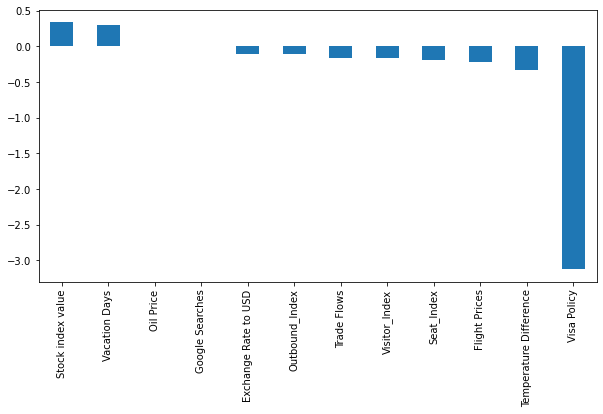

In [90]:
list_of_coef2['coef'].sort_values(ascending=False).plot(kind='bar', figsize = (10,5))

In [64]:
list_of_coef = []
for x,y in zip(model.coef_[0], nation_mean):
    print(y,x)
    list_of_coef.append()
    print('\n')

Visitor_Index -0.1653642132703273


Seat_Index -0.19284086825467497


Outbound_Index -0.1144184432581839


Stock index value 0.33538028052342345


Temperature Difference -0.33277906188193307


Oil Price 0.0


Exchange Rate to USD -0.10279128959932222


Google Searches -0.0005347853165389269


Flight Prices -0.21918443844892438


Trade Flows -0.1653642132703273


Visa Policy -3.127473937617418


Vacation Days 0.3040318079577648




In [94]:
from sklearn.cluster import AgglomerativeClustering

In [104]:
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')

In [105]:
y_hc = hc.fit_predict(nation_mean)

In [106]:
y_hc

array([0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 2, 0, 0, 0, 2, 2, 0, 2, 0, 1,
       0, 1, 1, 0, 2, 0, 1, 0, 0, 1, 0, 0, 2, 1, 0, 2, 0], dtype=int64)